In [1]:
# Import necessary packages and modules
import pandas as pd
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the Dataset
df =  pd.read_csv("StackPros_Assessment_DataScientist_J.csv", index_col=0)

# Print out first 10 rows of the dataset
df.head(10)

,Action,ID,ActionTime,Website,BannerSize,Brand,Color,StayTime
1,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1501207373254968,Facebook,728x90,JoeFresh,Pink,1.730627
2,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1501209660836689,Facebook,160x600,JoeFresh,Blue,0.615033
3,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1501209717498078,Facebook,160x600,Disney,Gold,1.232917
4,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1502831370458655,Other,300x250,Zara,Pink,1.004084
5,Click,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1502831506975457,Other,300x250,Carter's,White,0.204201
6,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1503351921109728,Facebook,160x600,Zara,White,0.208788
7,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1505434684991942,Facebook,160x600,Gap,Pink,2.283643
8,Click,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1505445690268414,Facebook,160x600,Burberry,Red,0.010048
9,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1505623612427643,Other,300x250,Disney,Yellow,0.068071
10,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1505637875085757,Other,300x250,Carter's,Gold,0.114499


In [3]:
df.shape


(100000, 8)

In [4]:
# Create table of summary statistics
df.describe(include = "all")

,Action,ID,ActionTime,Website,BannerSize,Brand,Color,StayTime
count,100000,100000,1.000000e+05,100000,100000,100000,100000,99993.000000
unique,2,3093,NaN,16,15,10,7,NaN
top,View,AMsySZYkZOPn04sH5gQG7xBcBGKz,NaN,Facebook,300x250,Carter's,Pink,NaN
freq,90010,2513,NaN,58059,43314,22438,32261,NaN
mean,NaN,NaN,1.506038e+15,NaN,NaN,NaN,NaN,1.000457
std,NaN,NaN,4.176429e+12,NaN,NaN,NaN,NaN,1.005150
min,NaN,NaN,1.500991e+15,NaN,NaN,NaN,NaN,0.000018
25%,NaN,NaN,1.502550e+15,NaN,NaN,NaN,NaN,0.286686
50%,NaN,NaN,1.504912e+15,NaN,NaN,NaN,NaN,0.692082
75%,NaN,NaN,1.508607e+15,NaN,NaN,NaN,NaN,1.386599


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10491d588>,
      dtype=object)

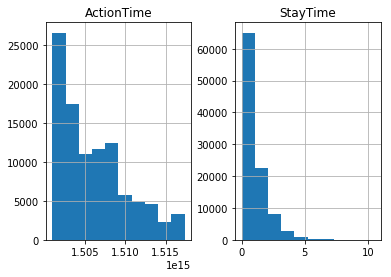

In [5]:
df.hist(figsize = (6,4))


## Perform Imputation on Missing Values - Python


In [6]:
# Replace the numeric columns with missing value to be the median
df_imp = df.fillna(df.median())
df_imp.head(10)

,Action,ID,ActionTime,Website,BannerSize,Brand,Color,StayTime
1,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1501207373254968,Facebook,728x90,JoeFresh,Pink,1.730627
2,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1501209660836689,Facebook,160x600,JoeFresh,Blue,0.615033
3,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1501209717498078,Facebook,160x600,Disney,Gold,1.232917
4,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1502831370458655,Other,300x250,Zara,Pink,1.004084
5,Click,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1502831506975457,Other,300x250,Carter's,White,0.204201
6,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1503351921109728,Facebook,160x600,Zara,White,0.208788
7,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1505434684991942,Facebook,160x600,Gap,Pink,2.283643
8,Click,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1505445690268414,Facebook,160x600,Burberry,Red,0.010048
9,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1505623612427643,Other,300x250,Disney,Yellow,0.068071
10,View,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1505637875085757,Other,300x250,Carter's,Gold,0.114499


## Data Analysis

In [7]:
mapping = {'View': 0, 'Click': 1}
df_imp = df_imp.replace({'Action': mapping})
df_imp.head()

,Action,ID,ActionTime,Website,BannerSize,Brand,Color,StayTime
1,0,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1501207373254968,Facebook,728x90,JoeFresh,Pink,1.730627
2,0,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1501209660836689,Facebook,160x600,JoeFresh,Blue,0.615033
3,0,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1501209717498078,Facebook,160x600,Disney,Gold,1.232917
4,0,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1502831370458655,Other,300x250,Zara,Pink,1.004084
5,1,AMsySZZ_MC-gwE-94t_QLt3kIbXh,1502831506975457,Other,300x250,Carter's,White,0.204201


In [8]:
len(df_imp.ID.unique())

3093

BannerSize and Website could be predictive features because they have higher relationship with Action than other categorical variables.

In [9]:
print('base:', df_imp.Action.mean())
print(df_imp.groupby('BannerSize').Action.agg({'mean', 'count'}).sort_values('mean', ascending=False).head())
print(df_imp.groupby('Website').Action.agg({'mean', 'count'}).sort_values('mean', ascending=False).head())

base: 0.0999
            count      mean
BannerSize                 
320x100        50  0.140000
768x1024       32  0.125000
1x1           400  0.112500
300x600      5247  0.106156
300x250     43314  0.100730
               count      mean
Website                       
AOL               41  0.146341
Youtube          217  0.124424
Twitter          123  0.113821
Sympatico        606  0.107261
Craigslist.ca   3595  0.105702


## Feature Engineering

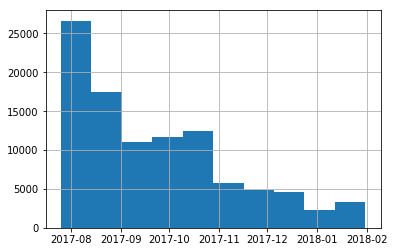

In [10]:
from datetime import datetime, timedelta, timezone
epoch = datetime(1970, 1, 1, tzinfo=timezone.utc)
mcs_format = df_imp.ActionTime
date_format = []
for i in range(1, df_imp.shape[0]+1):
    date_format.append(epoch + timedelta(microseconds=int(mcs_format[i])))
df_imp['ActionTime_Date'] = pd.Series(date_format).values
df_imp.head()
df_imp.ActionTime_Date.hist()
#https://www.epochconverter.com/

### Extract year, month, day, weekday etc to become new features

In [11]:
df_imp['Year'], df_imp['Month'], df_imp['Day'] = df_imp['ActionTime_Date'].dt.year, df_imp['ActionTime_Date'].dt.month, df_imp['ActionTime_Date'].dt.day
df_imp['Weekday'] = df_imp['ActionTime_Date'].dt.weekday_name
df_imp['Hour'] = df_imp['ActionTime_Date'].dt.hour

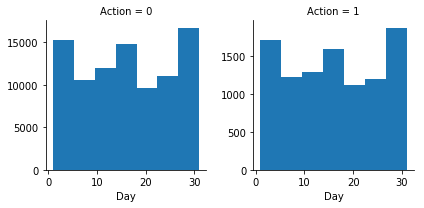

In [12]:
import seaborn as sns
g = sns.FacetGrid(df_imp, col='Action', sharey=False)
g.map(plt.hist, 'Day', bins=7)

Comparing the mean and the base, although these time features doesn't have strong relationship with Aciton, they still have some influence. So I'll keep them.

In [13]:
print('base:', df_imp.Action.mean())
print(df_imp.groupby('Weekday').Action.agg({'mean', 'count'}).sort_values('mean', ascending=False).head())
print(df_imp.groupby('Month').Action.agg({'mean', 'count'}).sort_values('mean', ascending=False).head())
print(df_imp.groupby('Year').Action.agg({'mean', 'count'}).sort_values('mean', ascending=False).head())
print(df_imp.groupby('Day').Action.agg({'mean', 'count'}).sort_values('mean', ascending=False).head())
print(df_imp.groupby('Hour').Action.agg({'mean', 'count'}).sort_values('mean', ascending=False).head())

base: 0.0999
           count      mean
Weekday                   
Sunday     12572  0.104836
Friday     14958  0.101484
Monday     14805  0.100439
Wednesday  15498  0.100336
Thursday   14170  0.098589
       count      mean
Month                 
7       9576  0.106934
12      6691  0.103124
11      6834  0.099649
9      18518  0.099201
8      34203  0.099114
      count      mean
Year                 
2017  95240  0.100147
2018   4760  0.094958
     count      mean
Day                 
29    3561  0.114294
22    2889  0.111111
3     3605  0.110957
6     3027  0.110010
7     3018  0.107356
      count      mean
Hour                 
11     2827  0.109303
5      3210  0.108100
15     5401  0.106832
22     5610  0.104456
19     5999  0.104351


Here I wanted to find how many times a user has viewed the same ad before he clicks into it, and also calculate the total view time before he clicks, based on the StayTime column. But considering the time spent coding algorithms I decided to finish other parts first.

In [14]:
sort_df = df_imp.sort_values('ActionTime_Date', ascending=False)
sort_df.head()

,Action,ID,ActionTime,Website,BannerSize,Brand,Color,StayTime,ActionTime_Date,Year,Month,Day,Weekday,Hour
4127,0,AMsySZaNbHOuIdXp4Wzp7XGbw3qs,1517356357079943,Facebook,160x600,JoeFresh,Yellow,0.560764,2018-01-30 23:52:37.079943,2018,1,30,Tuesday,23
4126,0,AMsySZaNbHOuIdXp4Wzp7XGbw3qs,1517356164075182,Facebook,300x250,Carter's,Pink,0.821382,2018-01-30 23:49:24.075182,2018,1,30,Tuesday,23
4125,0,AMsySZaNbHOuIdXp4Wzp7XGbw3qs,1517356162085729,Facebook,300x250,JoeFresh,Pink,0.233819,2018-01-30 23:49:22.085729,2018,1,30,Tuesday,23
53833,0,AMsySZa0ABYW6uOqbq3SnPDDEYvc,1517355755883109,TubeMogul,Other,JoeFresh,Pink,0.765256,2018-01-30 23:42:35.883109,2018,1,30,Tuesday,23
53832,0,AMsySZa0ABYW6uOqbq3SnPDDEYvc,1517355716881124,TubeMogul,Other,Zara,Gold,0.873819,2018-01-30 23:41:56.881124,2018,1,30,Tuesday,23


In [15]:
# times_viewed = []
# total_view_time = []
# for i in range(0, df.shape[0]):
#     for j in range(i+1, df.shape[0]):
#         a=sort_df[['ID','Website','Brand']].iloc[i]==sort_df[['ID','Website','Brand'].iloc[j]]
#         if sort_df['Action'].iloc[i] == 0 and sort_df['Action'].iloc[j] == 0 and a.all() == True:
#             times_viewed.append(sort_df[['StayTime']].iloc[i])
        
#             if sort_df['Action'].iloc[j] != 1:
            
            


# df['TimesViewed'] = pd.Series(date_format).values
# df['TotalViewTime'] = pd.Series(date_format).values

## Encoding Categorical Variables

In [16]:
# I extracted all the info from ActionTime_Date, so drop this column
df_imp = df_imp.drop(['ActionTime_Date'], axis=1)

In [17]:
df_imp = df_imp.drop(['ID'], axis=1)

In [18]:
df_imp.head()

,Action,ActionTime,Website,BannerSize,Brand,Color,StayTime,Year,Month,Day,Weekday,Hour
1,0,1501207373254968,Facebook,728x90,JoeFresh,Pink,1.730627,2017,7,28,Friday,2
2,0,1501209660836689,Facebook,160x600,JoeFresh,Blue,0.615033,2017,7,28,Friday,2
3,0,1501209717498078,Facebook,160x600,Disney,Gold,1.232917,2017,7,28,Friday,2
4,0,1502831370458655,Other,300x250,Zara,Pink,1.004084,2017,8,15,Tuesday,21
5,1,1502831506975457,Other,300x250,Carter's,White,0.204201,2017,8,15,Tuesday,21


In [19]:
df_imp['Year'] = df_imp['Year'].astype('category')
df_imp['Month'] = df_imp['Month'].astype('category')
df_clean = pd.get_dummies(df_imp, prefix=['Website', 'BannerSize', 'Brand', 'Color', 'Year', 'Month', 'Weekday'])
df_clean.columns
df_clean[:10]

,Action,ActionTime,StayTime,Day,Hour,Website_AOL,Website_Amazon,Website_Atedra,Website_Craigslist.ca,Website_Expedia,...,Month_10,Month_11,Month_12,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
1,0,1501207373254968,1.730627,28,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1501209660836689,0.615033,28,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1501209717498078,1.232917,28,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1502831370458655,1.004084,15,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,1502831506975457,0.204201,15,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1503351921109728,0.208788,21,21,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,1505434684991942,2.283643,15,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1505445690268414,0.010048,15,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,1505623612427643,0.068071,17,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,0,1505637875085757,0.114499,17,8,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Partition Data into Training and Validation Sets

In [20]:
# Our target variable is Action, and the rest are our feature set
target = df_clean.values[:,0]
feature = df_clean.values[:,1::]

# Create a 70/30 simple random sample split
from sklearn.cross_validation import train_test_split
target_train, target_val, feature_train, feature_val = train_test_split( target, feature, test_size = 0.3, random_state = 100)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
target_val.mean()

0.09923333333333334

## Build Models

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg = lg.fit(feature_train, target_train)


#### Likelihood of Click

In [23]:
y_pred_prob = lg.predict_proba(feature_val)[:, 1]
y_pred_prob

array([0.10071158, 0.10062837, 0.10066636, ..., 0.10063234, 0.10077453,
       0.10039046])

### Decision Tree

In [24]:
from sklearn import tree
# leaving everything as default, like the CAS version
ds = tree.DecisionTreeClassifier(criterion='entropy')
ds = ds.fit(feature_train,target_train)

### Gradient Boosting Tree

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb = gb.fit(feature_train,target_train)

### Neural Network

In [26]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn = nn.fit(feature_train,target_train)

### SVM
(takes too long to run)

In [27]:
# from sklearn import svm
# svm_clf = svm.SVC()
# svm_clf = svm_clf.fit(feature_train,target_train)

## Assess Performance

In [28]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_misclassification=False,show_classification_report=False, show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)))

    if show_misclassification:
        print ("Misclassification:{0:.3f}".format(1 - metrics.accuracy_score(y,y_pred)))
        
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y,y_pred))
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y,y_pred))

In [29]:
print("Logistic Regression: ")
measure_performance(feature_val,target_val,lg,show_accuracy=False, show_misclassification=True)
print('_'*40)
print("Decision Tree: ")
measure_performance(feature_val,target_val,ds,show_accuracy=False, show_misclassification=True)
print('_'*40)
print("Gradient Boost: ")
measure_performance(feature_val,target_val,gb,show_accuracy=False, show_misclassification=True)
print('_'*40)
print("Neural Network: ") 
measure_performance(feature_val,target_val,nn,show_accuracy=False, show_misclassification=True)

Logistic Regression: 
Misclassification:0.099
Confusion matrix
[[27023     0]
 [ 2977     0]]
________________________________________
Decision Tree: 
Misclassification:0.192
Confusion matrix
[[23880  3143]
 [ 2614   363]]
________________________________________
Gradient Boost: 
Misclassification:0.099
Confusion matrix
[[27022     1]
 [ 2977     0]]
________________________________________
Neural Network: 
Misclassification:0.099
Confusion matrix
[[27023     0]
 [ 2977     0]]


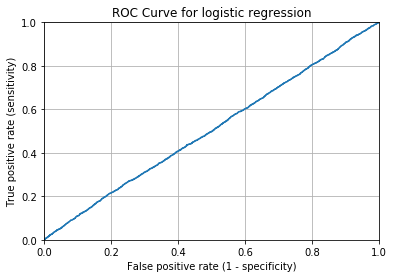

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(target_val, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for logistic regression')
plt.xlabel('False positive rate (1 - specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.grid(True)

From the measurements above, it is clear Dicision Tree did the worst. And for other models, they actually did nothing but predicted all response 0. I use Recursive Feature Elimination in the following step to decrease the number of features and try logistic regression again. 

In [31]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(feature, target)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False False False False False  True False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False  True False False False False False False False False False  True
 False False False False  True False False False  True False False False
 False False False False False False False False]
[ 1  1  1  1 57 41 44 36 45  1 43 17 46 42 53 51 47 38 50 10 39 54 24 48
  1 49 33 56 52 40  2 58 55  6 59 20 23  1 25 35  4 12 37 30 26 16  9  1
 21 29  7 34  1 32 31 22  1  5  3 27 28 14 13 18 19 15  8 11]


In [32]:
cols = df_clean.drop(['Action'], axis=1).columns.values[rfe.support_]
feature=df_clean[cols]
target=df_clean['Action']

In [33]:
target_train, target_val, feature_train, feature_val = train_test_split( target, feature, test_size = 0.3, random_state = 100)
lg = LogisticRegression()
lg = lg.fit(feature_train, target_train)
y_pred_prob = lg.predict_proba(feature_val)[:, 1]
print("likelihood:", y_pred_prob)
print('_'*40)
print("Logistic Regression: ")
measure_performance(feature_val,target_val,lg,show_accuracy=False, show_misclassification=True)

likelihood: [0.10071158 0.10062837 0.10066636 ... 0.10063234 0.10077453 0.10039046]
________________________________________
Logistic Regression: 
Misclassification:0.099
Confusion matrix
[[27023     0]
 [ 2977     0]]


Still same result. In the following I find the optimal cutoff value.

In [34]:
import numpy as np
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [35]:
threashold = Find_Optimal_Cutoff(target_val, y_pred_prob)
threashold

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[0.10032659058063331]

In [36]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], threashold[0])[0]
print(y_pred_prob[0:10])
print(y_pred_class[0:10])

[0.10071158 0.10062837 0.10066636 0.10014662 0.10063532 0.10013052
 0.09981356 0.09973496 0.10058788 0.09989212]
[1. 1. 1. 0. 1. 0. 0. 0. 1. 0.]


In [37]:
print(metrics.accuracy_score(target_val, y_pred_class))
print(metrics.confusion_matrix(target_val, y_pred_class))

0.4986
[[13475 13548]
 [ 1494  1483]]


This model has better true positive rate, but much lower accuracy.

## Conclusion

If it is not the fact that the dataset has been manually designed and modified for confidentiality reason, then I think the feature engineering part shold be reconsidered. For example, the websites can be group into several categories like social media, e-commerce, etc; Brand can also be segmented into clusters. 